In [1]:
%matplotlib inline
#from preamble import *
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = "gray"
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=0.1)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler = StandardScaler()
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 3.4 Dimensionality Reduction(차원 축소), Feature Extraction(특성 추출) and Manifold(다양성) Learning
- Feature Extraction(특성 추출)
  - 원본 데이터에 존재하는 유의미하고 중요한 특성만 뽑아내는 기법
  - 또는 중요하다고 생각되는 특성을 변형하여 뽑아내는 기법
  
  
- Principal Component Analysis (PCA)
  - 가장 간단하고 흔히 사용하는 대표적인 기법
  - Dimensionality Reduction(차원 축소), Feature Extraction(특성 추출)에 사용됨
- Non-negative matrix factorization(인수분해) (NMF)
  - 0 또는 양수로 이루어진 매트릭스
  - 특성 추출에 널리 사용
  - Dimensionality Reduction(차원 축소), Feature Extraction(특성 추출)에 사용됨
- t-distributed stochastic neighbor embedding (t-SNE)
  - 2차원 산점도를 이용해 시각화 용도로 많이 활용

#### 3.4.1 Principal Component Analysis (PCA)

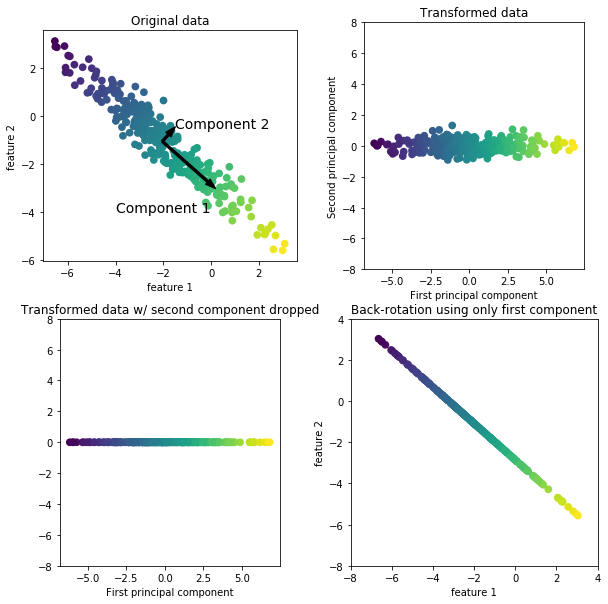

In [2]:
mglearn.plots.plot_pca_illustration()

- 원본데이터가 2사분면에 위치하고있고, 가로축과 세로축으로 두 개의 feature가 이루어져 있다.
- component란 그림에서 보는 바와 같은데, 주어진 데이터에서 분산이 각 방향으로 가장 큰 방향으로 주어진다. (반대 방향으로 잡혀도 상관없다.)
- 표준 기저 대신 분산이 가장 큰 방향으로 새로운 기저가 잡힌 것으로 이해할 수 있다.
- 각 component들은 서로 직교하게 잡혀야 한다.
- 1사분면의 그림은 새로 잡힌 기저를 다시 x축 y축과 평행하도록 틀어버린 그림이다.
- component1에 해당하는 그림만 남긴것이 3사분면의 그림이다.
- https://www.dropbox.com/s/p83wm8k6fq3lgou/00-2.PCA.pptx?dl=0
- https://nbviewer.jupyter.org/github/link-kut/deeplink/blob/master/0.Common/4.MachineLearning/02.PCA/PCA.ipynb

### Principal Component Analysis (PCA) Example
- http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

#### 0. Generating some 3-dimensional sample data
- We created two $3×20$ datasets - one dataset for each class $w_1$ and $w_2$ - where $k$th column can be pictured as a 3-dimensional vector 

$$\mathbf{x_{k}} = \begin{bmatrix}
x_{1, k} \\
x_{2, k} \\
x_{3, k}
\end{bmatrix}$$
- So, our dataset will have the two forms 

$$X_1 = 
\begin{bmatrix}
    \mathbf{x_{1}} & \mathbf{x_{2}} & \cdots & \mathbf{x_{20}}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,20} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,20} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,20}    
  \end{bmatrix}$$
  
$$X_2 = 
\begin{bmatrix}
    \mathbf{x_{1}} & \mathbf{x_{2}} & \cdots & \mathbf{x_{20}}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,20} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,20} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,20}    
  \end{bmatrix}$$  

In [3]:
import numpy as np
print("Numpy Versio: {}\n".format(np.version.version))
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

np.random.seed(2) # random seed for consistency

mu_vec1 = np.array([0,0,0]) # 평균
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # 편차
class1_sample = np.random.multivariate_normal(mean=mu_vec1, cov=cov_mat1, size=20).T # 랜덤하게
print('Class1 Sample:\n', class1_sample)
assert class1_sample.shape == (3, 20) # 데이터가 20개, 특성이 3개. 
# assert는 저 두 개가 동일하지 않으면 경고를 내서, 중간중간에 확인하는 용도로 쓰인다.

print()

mu_vec2 = np.array([2,2,2])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mean=mu_vec2, cov=cov_mat2, size=20).T
print('Class2 Samples:\n', class2_sample)
assert class2_sample.shape == (3, 20)

Numpy Versio: 1.14.2

Class1 Sample:
 [[-0.417  1.640  0.503 -0.909  0.042 -0.596 -0.748 -0.156 -0.339 -1.188
  -0.269  0.113  0.502  0.542 -1.868 -0.336 -0.829 -0.381  0.433  0.508]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
   2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
  -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859]]

Class2 Samples:
 [[ 1.581  2.326  1.322  2.735  1.618  3.584  2.695  1.923  1.596  3.218
   2.382  3.407  2.380 -0.344  0.867  4.585  1.281  1.440  1.724  1.071]
 [ 1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
   2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]
 [ 1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
   2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]]


- Just to get a rough idea how the samples of our two classes $w_1$ and $w_2$ are distributed, let us plot them in a 3D scatter plot.

Populating the interactive namespace from numpy and matplotlib


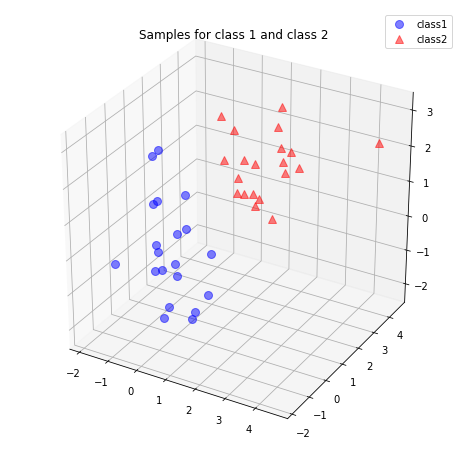

In [13]:
# 화면에 그래프로 그리기
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

# class2의 분포가 좀 더 위쪽에 위치하고 있음. 평균이 높아서.

### 1. Implement step-by-step PCA manually (6 step)
#### 1) Take the whole dataset consisting of $𝑑$-dimensional samples ignoring the class labels
- So, our dataset will finally have the following form 
$$X = 
\begin{bmatrix}
    \mathbf{X_{1}}, \mathbf{X_{2}}    
  \end{bmatrix}
=  
\begin{bmatrix}
    \mathbf{x_{1}} & \mathbf{x_{2}} & \cdots & \mathbf{x_{40}}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,40} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,40} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,40}    
  \end{bmatrix}$$

In [15]:
all_samples.shape

(6, 20)

In [16]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=0)

In [17]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1) # axis=0이면 행으로 묶임
assert all_samples.shape == (3, 40) # 행으로 묶일 땐 40,3 열로 묶일 땐 3, 40
print('All Samples:\n', all_samples)

All Samples:
 [[-0.417  1.640  0.503 -0.909  0.042 -0.596 -0.748 -0.156 -0.339 -1.188
  -0.269  0.113  0.502  0.542 -1.868 -0.336 -0.829 -0.381  0.433  0.508
   1.581  2.326  1.322  2.735  1.618  3.584  2.695  1.923  1.596  3.218
   2.382  3.407  2.380 -0.344  0.867  4.585  1.281  1.440  1.724  1.071]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
   2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
   1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
   2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
  -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859
   1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
   2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]]


### 2) Compute the $𝑑$-dimensional zero-mean vector
- 현재 3차원

In [7]:
print("all_samples[0,:]\n", all_samples[0,:], end="\n\n")
print("all_samples[1,:]\n", all_samples[1,:], end="\n\n")
print("all_samples[2,:]\n", all_samples[2,:], end="\n\n")

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
assert mean_vector.shape == (3, 1)

print('Mean Vector:\n', mean_vector)

all_samples[0,:]
 [-0.417  1.640  0.503 -0.909  0.042 -0.596 -0.748 -0.156 -0.339 -1.188
 -0.269  0.113  0.502  0.542 -1.868 -0.336 -0.829 -0.381  0.433  0.508
  1.581  2.326  1.322  2.735  1.618  3.584  2.695  1.923  1.596  3.218
  2.382  3.407  2.380 -0.344  0.867  4.585  1.281  1.440  1.724  1.071]

all_samples[1,:]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
  2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
  1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
  2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]

all_samples[2,:]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
 -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859
  1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
  2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]

Mean Vector:
 [[ 0.941]
 [ 0.815]
 [ 0.994]]


- 평균이 1, 1, 1에 맞춰 나온다. (0, 0, 0과 2, 2, 2의 평균)

### 3) Compute the covariance matrix of the whole data set
- 하나의 벡터에 대한 variance를 구하기는 쉽다.
  - 평균을 구하고 각각의 요소에 대해 평균을 제한다음, 그들의 평균을 구하면 된다.
- 두 개 이상의 벡터에 대한 covariance 구하기는?
- The covariance matrix is computed by the following equation:
$$
S = {1 \over {40-1}} \cdot \sum\limits_{k=1}^{40} (\pmb x_k - \pmb m)\;(\pmb x_k - \pmb m)^T
$$
where $m$ is the mean vector

  - 위의 수식에서 벡터 x는 세 개의 벡터가 있다고 가정 할 때, 세 벡터 각각 벡터의 n번째 요소들로 이루어진 하나의 벡터다. v1의 첫번째 요소, v2의 첫번째 요소, v3의 첫번째 요소로 x1 벡터 하나가 이루어진다.

In [8]:
cov_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    assert all_samples[:, i].shape == (3,)
    cov_matrix += (all_samples[:, i].reshape(3, 1) - mean_vector).dot((all_samples[:, i].reshape(3, 1) - mean_vector).T)
cov_matrix = cov_matrix / 39
print('Covariance Matrix:\n', cov_matrix)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


- 세 개의 covaricne를 구한 결과벡터가 각각 행과 열을 이룬 결과
- 두 벡터의 분포가 동일할수록 값이 커지고,
- 두 벡터의 분포가 상이할수록(벡터의 방향이 다르다면) 값이 작아진다.
- 벡터끼리의 상관관계가 나온다.
- 이 값을 0과 1사이로 normalization하면 피어슨 상관계수가 된다.

- we can also use in-built **numpy.cov()** function

In [9]:
assert all_samples.shape == (3, 40)
cov_mat = np.cov(all_samples) # all_samples.T를 하면 40*40이 나옴. 목적에 맞지 않음
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


### 4) Compute eigenvectors and corresponding eigenvalues  about the covariance matrix

In [21]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print('{} \n\n {}'.format(eig_val_cov, eig_vec_cov))
print()
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(3, 1) # 행은 전체, 열은 i 각각
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print('위 Eigenvalue와 mapping되는 Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print(40 * '-')

[ 4.112  1.000  1.573] 

 [[-0.588 -0.667  0.458]
 [-0.452 -0.199 -0.870]
 [-0.671  0.718  0.184]]

Eigenvalue 1: 4.112349421674584
위 Eigenvalue와 mapping되는 Eigenvector 1: 
[[-0.588]
 [-0.452]
 [-0.671]]
----------------------------------------
Eigenvalue 2: 1.0003892833440393
위 Eigenvalue와 mapping되는 Eigenvector 2: 
[[-0.667]
 [-0.199]
 [ 0.718]]
----------------------------------------
Eigenvalue 3: 1.5729106449928036
위 Eigenvalue와 mapping되는 Eigenvector 3: 
[[ 0.458]
 [-0.870]
 [ 0.184]]
----------------------------------------


- Checking the eigenvector-eigenvalue calculation
$$\pmb\Sigma\pmb{v} = \lambda\pmb{v}$$
where
$$\pmb\Sigma = Covariance \; matrix\\
\pmb{v} = \; Eigenvector\\
\lambda = \; Eigenvalue$$

- the eigenvectors have all the same unit length 1

In [18]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:, i].reshape(3, 1)
    np.testing.assert_array_almost_equal(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv) # 위의 공식과 동일함
    # 두 벡터의 요소가 같은지를 보는데, almost인 이유는 floating연산에 의해 약간의 오차가 발생할 수 있기 때문이다.
    print('{} \n:\n {}'.format(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv))
    print('Uint length Check: {}'.format(np.linalg.norm(eigv))) # 벡터의 norm은 벡터의 크기.
    print()

[[-2.418]
 [-1.857]
 [-2.760]] 
:
 [[-2.418]
 [-1.857]
 [-2.760]]
Uint length Check: 0.9999999999999999

[[-0.667]
 [-0.199]
 [ 0.718]] 
:
 [[-0.667]
 [-0.199]
 [ 0.718]]
Uint length Check: 0.9999999999999999

[[ 0.720]
 [-1.368]
 [ 0.290]] 
:
 [[ 0.720]
 [-1.368]
 [ 0.290]]
Uint length Check: 1.0



- Visualizing the eigenvectors

[-0.588 -0.452 -0.671]
[-0.667 -0.199  0.718]
[ 0.458 -0.870  0.184]


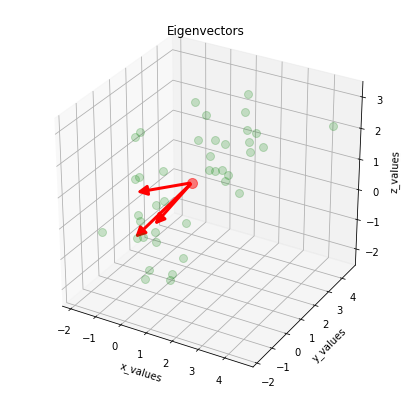

In [22]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

for v in eig_vec_cov.T:
    print(v)
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

    ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

- component 1, 2, 3의 모습
- 데이터셋의 분산이 가장 큰 방향으로 잡힌 모습
- the above eigenvectors will form the axes of the new feature subspace.
- 따라서 이 벡터들을 내적시키면 0에 가까운 값이 나와야 한다. 아래의 코드.

In [33]:
for v1 in eig_vec_cov:
    for v2 in eig_vec_cov:
        print(v1.dot(v2), end=", ")
    print()

print()

0.9999999999999998, -4.440892098500626e-16, -1.1102230246251565e-16, 
-4.440892098500626e-16, 1.0, 2.7755575615628914e-16, 
-1.1102230246251565e-16, 2.7755575615628914e-16, 0.9999999999999998, 



### 5) Sorting the eigenvectors by decreasing eigenvalues and choose $𝑘$ eigenvectors with the largest eigenvalues to form a $𝑑×𝑘$ dimensional matrix $P$

- Sorting the eigenvectors by decreasing eigenvalues

In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

4.112349421674584
1.5729106449928036
1.0003892833440393


- Choosing $k$ eigenvectors with the largest eigenvalues
  - $k=2$: we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace
  - We combine the 2 eigenvectors to construct our $k×d$-dimensional (i.e., $2×3$-dimensional) eigenvector matrix $P$.

In [25]:
matrix_p = np.array((eig_pairs[0][1], eig_pairs[1][1]))
print('Matrix P:\n', matrix_p)

Matrix P:
 [[-0.588 -0.452 -0.671]
 [ 0.458 -0.870  0.184]]


### 6) Use this $P$ matrix to transform the samples onto the new subspace
- we use the $2×3$-dimensional matrix $P$ that we just computed to transform our samples onto the new subspace via the equation $y=P×x$.

In [26]:
transformed = np.matmul(matrix_p, all_samples)
assert transformed.shape == (2,40)

- Visualize the transformed $𝑘×40$-dimensional (i.e., $2×40$-dimensional) samples in the new subspace.

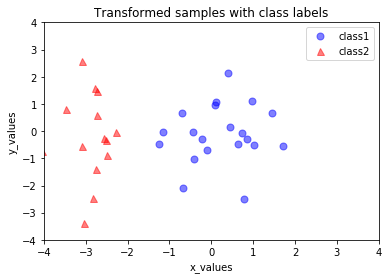

In [27]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## 2. Using the PCA class from the sklearn.decomposition library to confirm our results
- [Reference] http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- For the data samples, we assume that they are organized such that each row corresponds to each sample, so that we have to transpose our dataset.

$$\mathbf{x_{k}} = \begin{bmatrix}
x_{1, k} \\
x_{2, k} \\
x_{3, k}
\end{bmatrix}$$
<br/>
<br/>
$$X = 
\begin{bmatrix}
    \mathbf{x_{1}} & \mathbf{x_{2}} & \cdots & \mathbf{x_{20}}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,20} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,20} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,20}    
  \end{bmatrix}$$
<br/>
<br/>
$$\mathbf{x_{k}^T} = \begin{bmatrix}
x_{1, k}, 
x_{2, k},
x_{3, k}
\end{bmatrix}$$
<br/>
$$X^T = 
\begin{bmatrix}
    \mathbf{x_{1}^T} \\ 
    \mathbf{x_{2}^T} \\ 
    \vdots \\
    \mathbf{x_{20}^T}    
  \end{bmatrix}
=
\begin{bmatrix}
    x_{1,1} & x_{2,1} & x_{3,1} \\
    x_{1,2} & x_{2,2} & x_{3,2} \\
    \vdots & \vdots & \vdots\\
    x_{1,20} & x_{2,20} & x_{3,20}   
  \end{bmatrix}$$

In [32]:
print('All Samples:\n', all_samples)
print()
print('All Transposed Samples:\n', all_samples.T)

All Samples:
 [[-0.417  1.640  0.503 -0.909  0.042 -0.596 -0.748 -0.156 -0.339 -1.188
  -0.269  0.113  0.502  0.542 -1.868 -0.336 -0.829 -0.381  0.433  0.508
   1.581  2.326  1.322  2.735  1.618  3.584  2.695  1.923  1.596  3.218
   2.382  3.407  2.380 -0.344  0.867  4.585  1.281  1.440  1.724  1.071]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
   2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
   1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
   2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
  -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859
   1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
   2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]]

All Transposed Samples:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.2

- When using the PCA class, we can directly specify to how many components we want to reduce our input dataset via the **n_components** parameter.
  - n_components: int, None or string - Number of components to keep
<br/>
<br/>
  
- Next, we just need to use the **.fit_transform()** in order to perform the dimensionality reduction.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transf = pca.fit_transform(all_samples.T)
print(pca.explained_variance_ratio_)

[ 0.615  0.235]


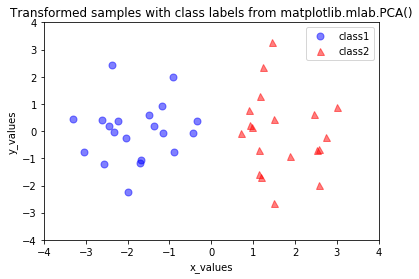

In [36]:
plt.plot(transf[0:20,0], transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf[20:40,0], transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

- The plot above seems to be the mirror image of the plot from out step by step approach. 
- This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by $×(−1)$ to revert the mirror image

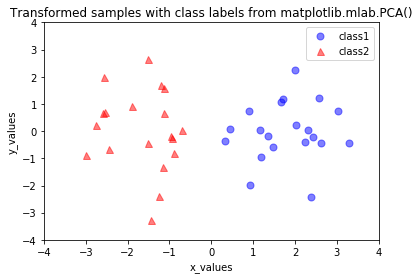

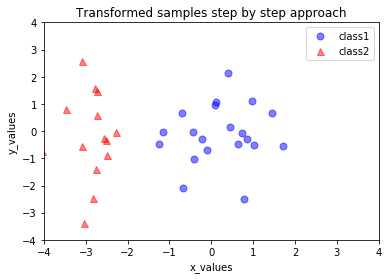

In [37]:
# sklearn.decomposition.PCA
transf = transf * (-1)

plt.plot(transf[0:20,0], transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf[20:40,0], transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')

plt.show()

- Looking at the 2 plots above, the distributions along the component axes look identical, only the center of the data is slightly different. 
- If we want to make the results produced by the step-by-step approach equal to the ones produced by the scikit-learn’s PCA class, just subtract the mean vectors from the samples X to center the data at the coordinate system’s origin

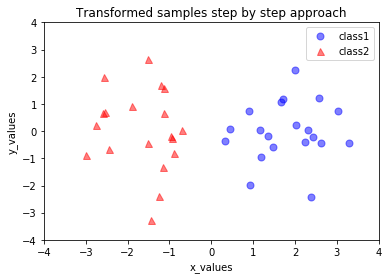

In [38]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
assert mean_vector.shape == (3, 1)

transformed = np.matmul(matrix_p, all_samples - mean_vector)

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')

plt.show()

##### Applying PCA to the cancer dataset for visualization
- 유방함 데이터의 특성값의 개수는 30개
- 30개의 특성들에 대한 산점도 그래프를 그리면 총 435개의 산점도가 산출됨
- 보다 더 쉽게 특성 데이터들을 시각화 하는 방법은 악성(Malignant)와 양성(Benign)에 대해 30개의 특성의 히스토그램을 그리는 것 

cancer.data.shape: (569, 30)


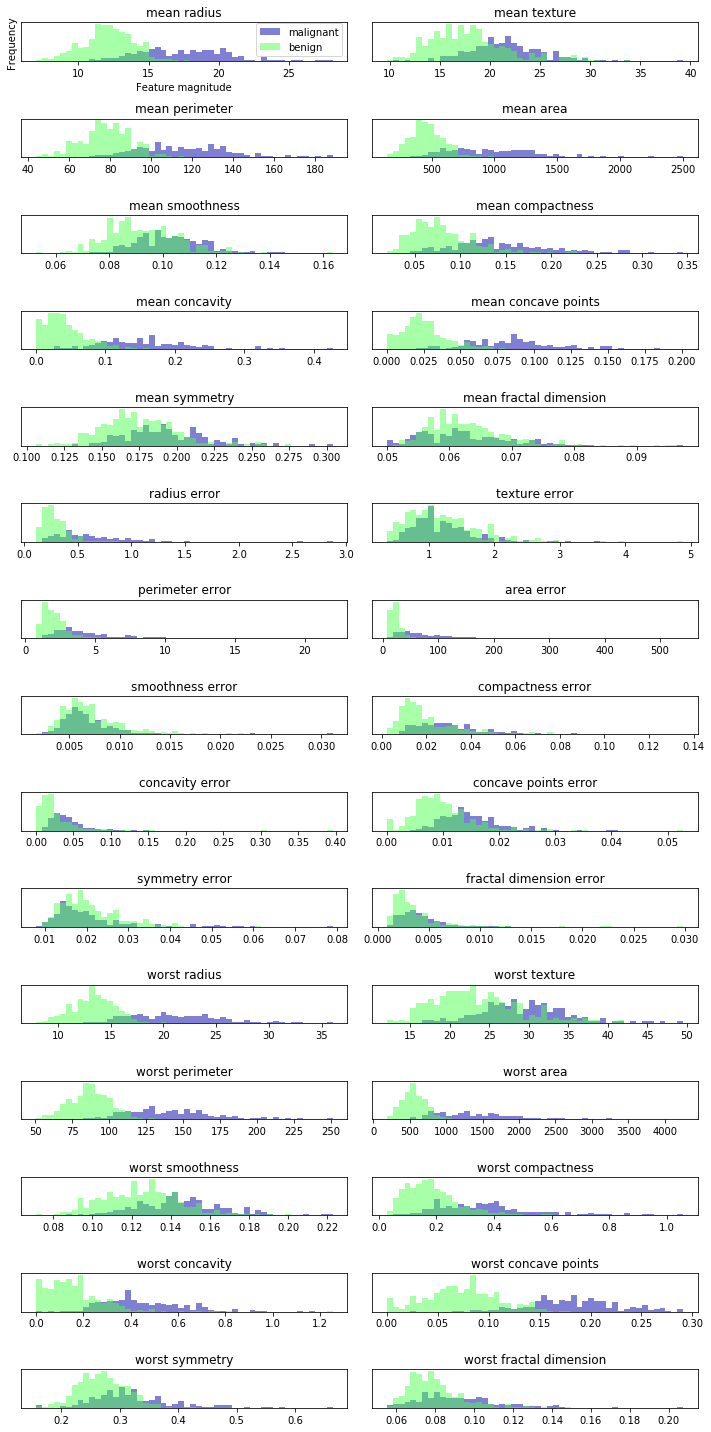

In [39]:
print("cancer.data.shape: {}".format(cancer.data.shape))

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30): # 특성이 30개
    _, bins = np.histogram(cancer.data[:, i], bins=50) # i 하나하나가 특성
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

- 위 그래프에서 다음 두 개의 특성 주목
  - smoothness error: 두 히스토그램이 겹쳐서 별로 쓸모 없는 특성임
  - worst concave points: 두 히스토그램이 확실이 구분되어 매우 유용한 특성임
  - 중요한 특성들을 이렇게 뽑아내는 것이 좋다.
  - texture error 특성의 경우에는 오히려 없애는 것이 더 좋을 수 있다.
  - 이렇게 차원을 축소한다. 30개의 특성을 몇 가지의 특성만을 가져온다.

- PCA 적용전에 StandardScaler를 사용하여 각 특성의 분산이 1이 되도록 스케일링

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
print("X_scaled.shape: {}".format(X_scaled.shape))

X_scaled.shape: (569, 30)


- n_components: 차원 축소의 결과로 남게될 차원의 개수

In [42]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("P: {}".format(pca.components_.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)
P: (2, 30)


- XP = Y
  - Y는 PCA를 통해 찾아낸 두 개의 특성으로 이루어진 2by2배열일 때, 상관계수 매트릭스가 [[1 0],[0 1]]에 가까울수록 좋다.
  - 30개의 조합 중 가장 좋은 데이터부터 하나씩 가져온다. 따라서 component의 개수를 높일수록 품질이 좋지 않은 것들이 들어가게 된다.
  - 두 특성이 서로 상관관계가 없다는 이야기이기 때문이다.
  - ppt 15쪽

Text(0,0.5,'Second principal component')

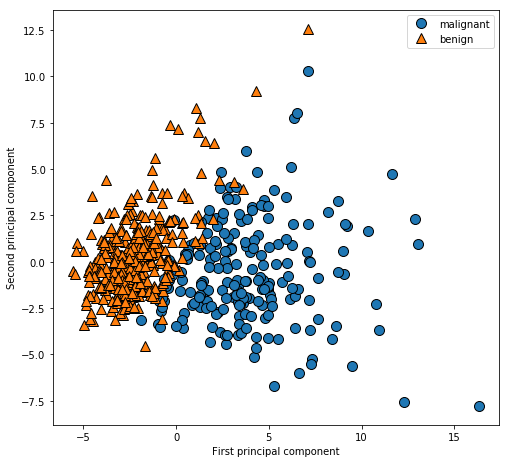

In [43]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 산출된 주성분은 원본 데이터에 있는 해당 주성분 방향에 대응하는 여러 특성이 조합된 형태
- components_  변수
  - 주성분의 구성 모습이 담겨 있음

In [44]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [45]:
print("PCA components:\n{}".format(pca.components_))
# Out[2]의 두 component를 의미함

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.170  0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.210  0.229  0.251  0.123  0.132]
 [-0.234 -0.060 -0.215 -0.231  0.186  0.152  0.060 -0.035  0.190  0.367
  -0.106  0.090 -0.089 -0.152  0.204  0.233  0.197  0.130  0.184  0.280
  -0.220 -0.045 -0.200 -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0,0.5,'Principal components')

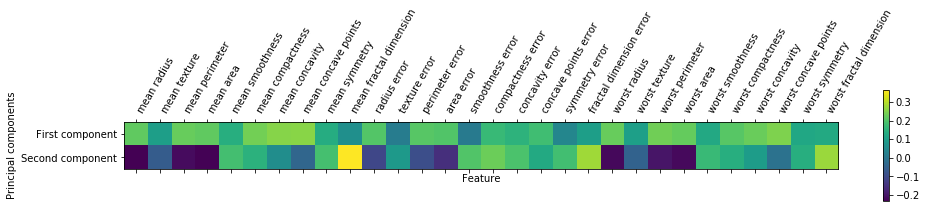

In [46]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- X하나(1,30)*P(30,2) = (1,2)
- 값을 많이 가져오냐 많이 안가져오냐. 0일수록 안가져오는 것, 절대값이 클 수록 많이 가져오는 것

5
[ 0.443  0.190  0.094  0.066  0.055]
0.8473427431680721


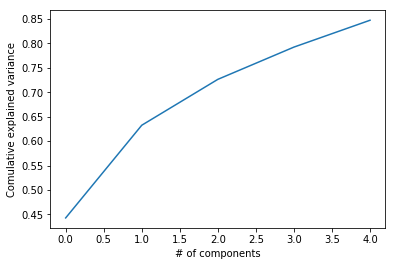

In [50]:
from sklearn.datasets import load_breast_cancer
# GradientBoosting적용한 코드

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=0.8) # 0.8
pca.fit(X_scaled)

print(pca.n_components_) # 분산의 정도가 80%정도는 되는 주성분을 뽑아내라. --> 자동적으로 component 개수가 정해진다.
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Comulative explained variance")
plt.show()

- 오리지널 데이터를 가장 잘 설명해주는 특성이 제일 먼저 나온다.
- 그래프는 cumulative하게 벡터 요소의 값을 찍어준 것이다.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
# GradientBoosting적용한 코드

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=0.8) # 0.8
pca.fit(X_scaled)

print(pca.n_components_) # 분산의 정도가 80%정도는 되는 주성분을 뽑아내라. --> 자동적으로 component 개수가 정해진다.
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Comulative explained variance")
plt.show()

X_pca = pca.transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_train, X_test, y_tarin, y_test = train_test_split(
    X_pca,
    cancer.target,
    stratify = cancer.target,
    random_state = 66
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

##### Eigenfaces for feature extraction
- PCA를 사용한 특성 추출
  - 원본 데이터 표현보다 분석하기에 더 적합한 데이터 표현을 찾을 수 있으리라는 생각에서 출발<br/><br/>

- 얼굴 이미지에서 주요 특성 추출하는 응용 제작
  - LFW (Labled Faces in the Wild) 데이터셋 활용
    - 인터넷에서 Crawling한 유명 인사(2000년 초반 이후의 정치인, 가수, 배우, 운동선수)들의 얼굴 이미지
    - 처리 속도를 높이기 위해 흑백 이미지를 사용하고 스케일을 줄임
      - fetch_lfw_people 함수 사용
      - 인자
        - color=False (기본값)
          - color가 True이면 3 RGB channels 값 유지          
        - resize=0.5 (기본값)
        - min_faces_per_person=None (기본값)
          - 각 사람 얼굴당 최소한의 이미지 개수를 지정
    - 출처: 메사추세츠 애머스트 주립대학의 Vision Lab (http://vis-www.cs.umass.edu/lfw/)

In [57]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape)) # 사람에 2463장의 사진
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names))) # 42명의 이름
print()
print("people.data.shape: {}".format(people.data.shape)) # 이미지를 두 차원에서 한 차원으로. 
print("people.target.shape: {}".format(people.target.shape)) 

KeyboardInterrupt: 

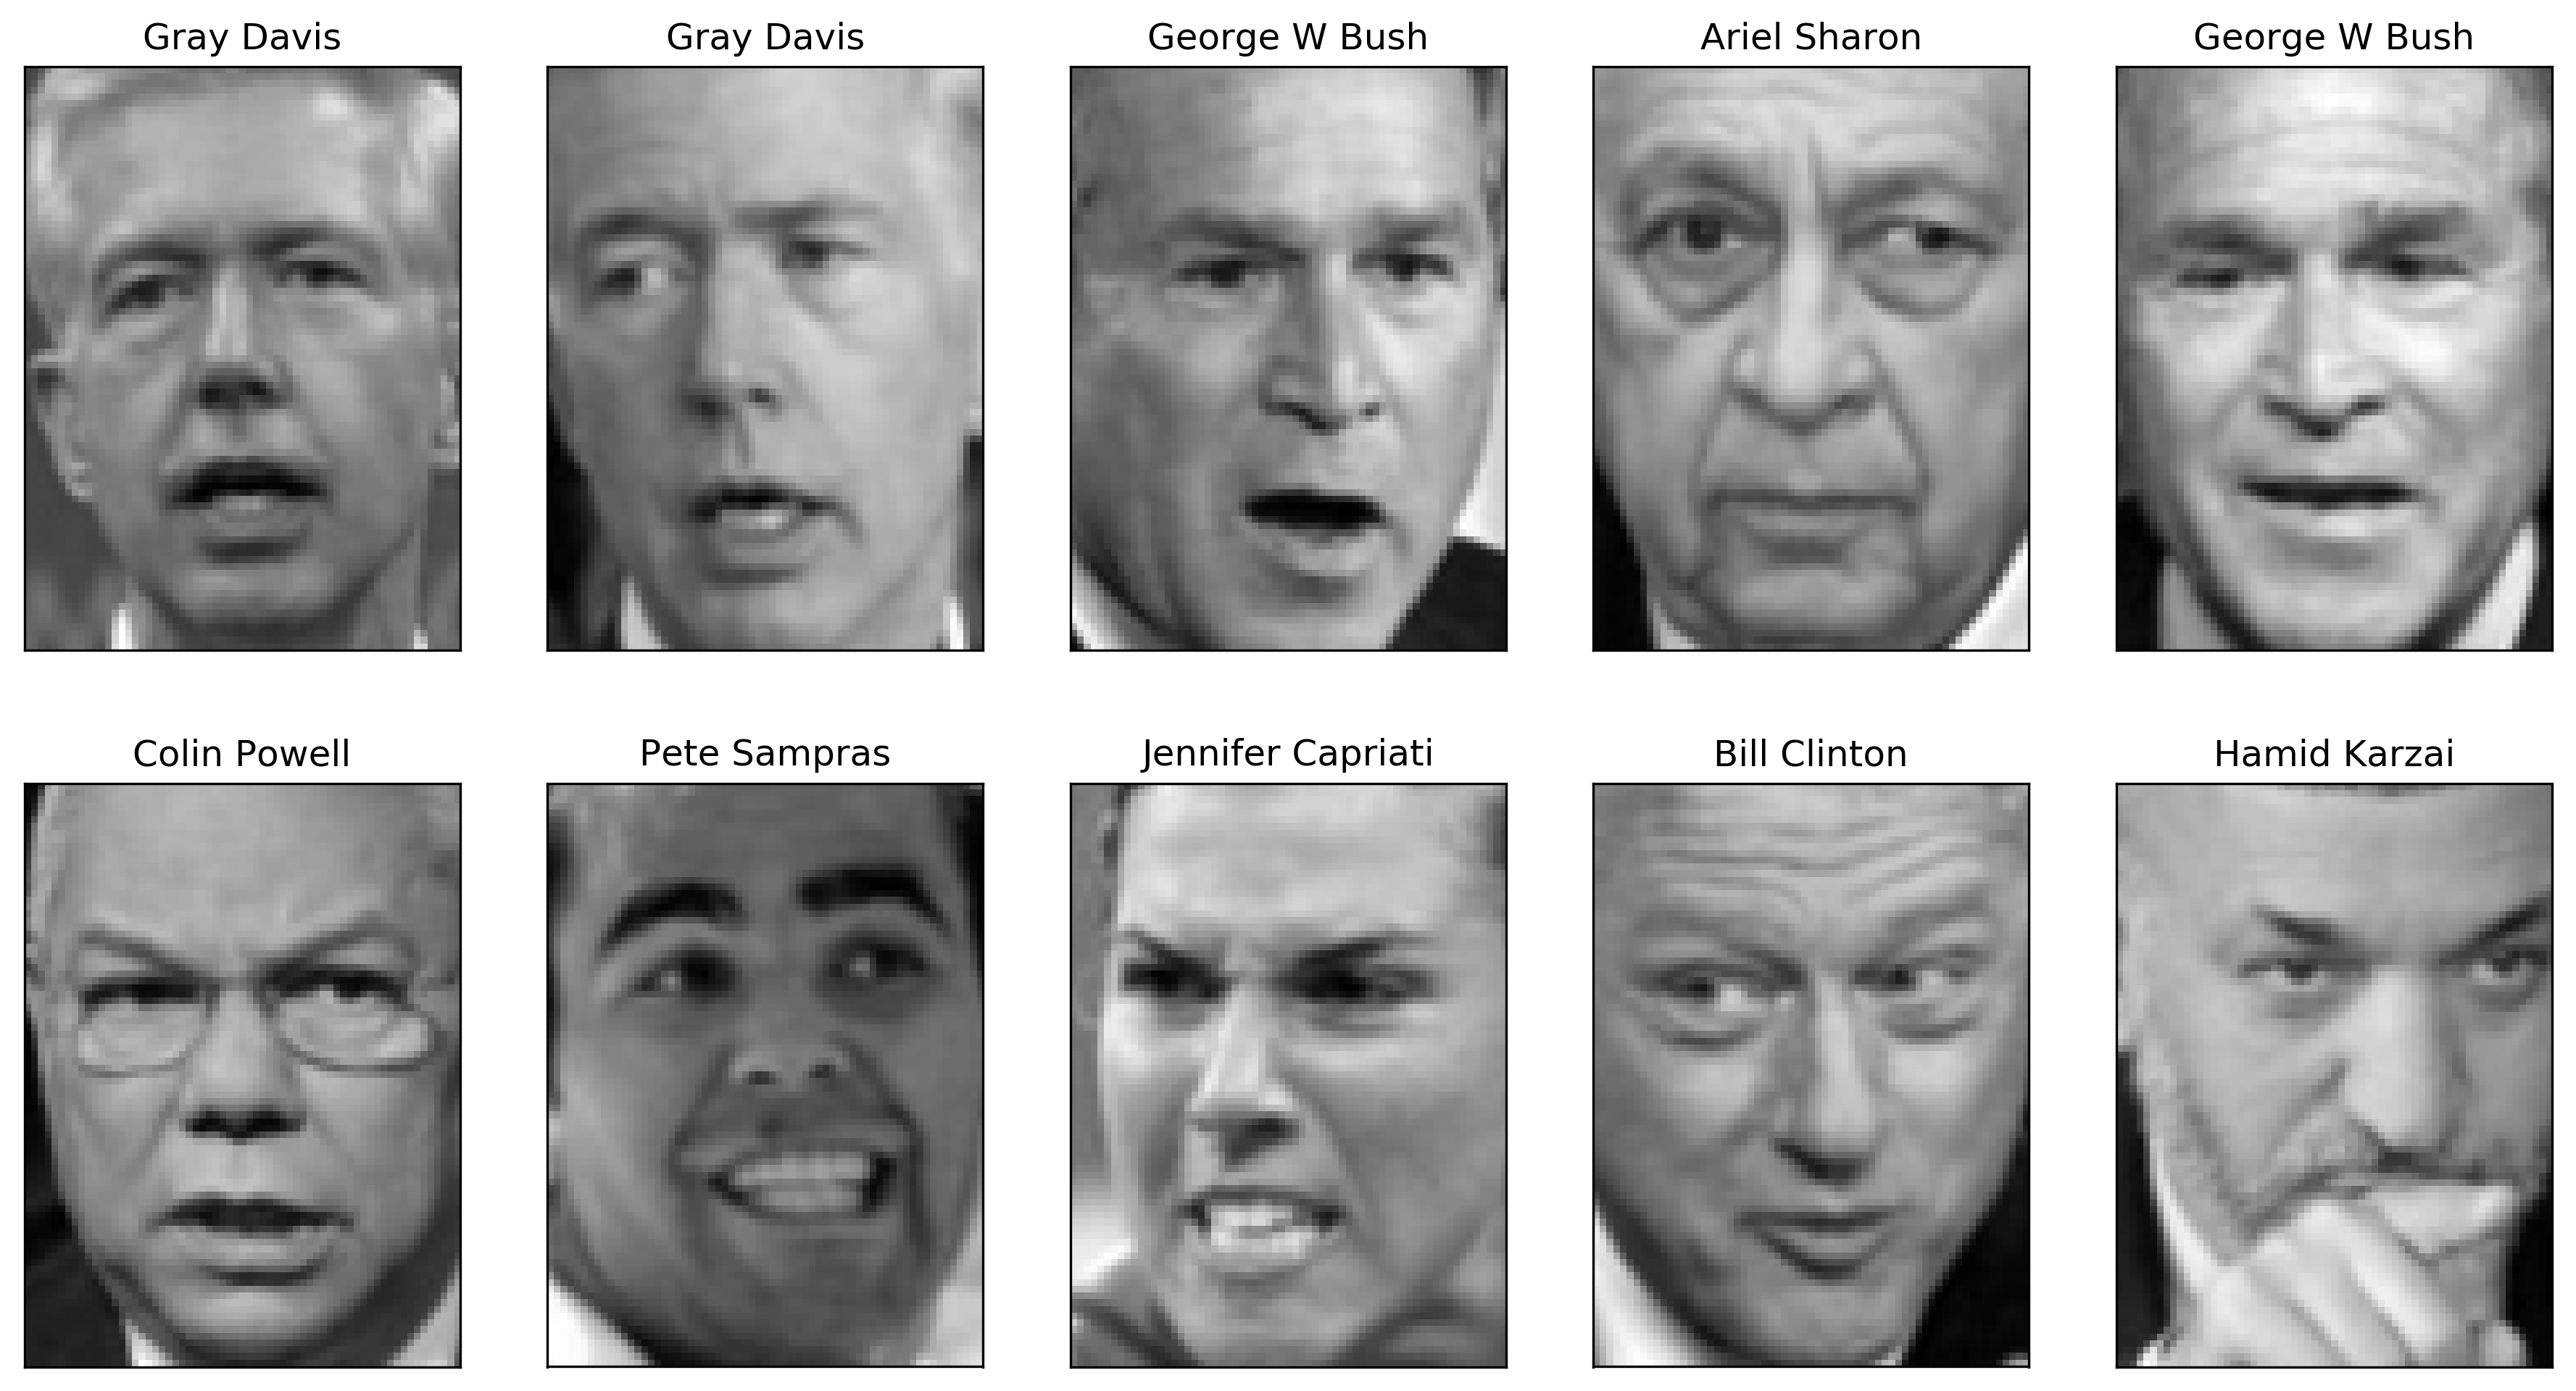

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

- George W Bush (530)와 Colin Powell (236)의 이미지가 많음

In [23]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i, name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

[ 0] Alejandro Toledo         39   [ 1] Alvaro Uribe             35   [ 2] Amelie Mauresmo          21   
[ 3] Andre Agassi             36   [ 4] Angelina Jolie           20   [ 5] Ariel Sharon             77   
[ 6] Arnold Schwarzenegger    42   [ 7] Atal Bihari Vajpayee     24   [ 8] Bill Clinton             29   
[ 9] Carlos Menem             21   [10] Colin Powell            236   [11] David Beckham            31   
[12] Donald Rumsfeld         121   [13] George Robertson         22   [14] George W Bush           530   
[15] Gerhard Schroeder       109   [16] Gloria Macapagal Arroyo  44   [17] Gray Davis               26   
[18] Hamid Karzai             22   [19] Hans Blix                39   [20] Hugo Chavez              71   
[21] Igor Ivanov              20   [22] Jack Straw               28   [23] Jacques Chirac           52   
[24] Jean Chretien            55   [25] Jennifer Aniston         21   [26] Jennifer Capriati        42   
[27] Jennifer Lopez           21   [28] Jeremy

In [24]:
# 맥시멈 50개까지만 가져오기. 사진 개수가 적은 사람은 적은대로 가져옫기
print("people.target.shape:", people.target.shape)
print()
mask = np.zeros(people.target.shape, dtype=np.bool)

print("mask.shape:", mask.shape)
print()

print("np.unique(people.target):\n{0}".format(np.unique(people.target)))
print()

for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

people.target.shape: (2936,)

mask.shape: (2936,)

np.unique(people.target):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58]

np.where(people.target == 0):
(array([ 139,  199,  361,  551,  815,  944,  976, 1010, 1113, 1143, 1164,
       1249, 1383, 1466, 1502, 1658, 1667, 1679, 1741, 1805, 1815, 1852,
       1940, 1947, 1967, 2110, 2114, 2167, 2300, 2367, 2433, 2457, 2542,
       2568, 2570, 2615, 2736, 2874, 2911]),)

np.where(people.target == 1):
(array([  73,   94,  176,  221,  226,  230,  301,  305,  372,  723,  738,
        796,  800,  804,  972, 1068, 1205, 1390, 1413, 1422, 1597, 1671,
       1698, 1787, 2140, 2171, 2182, 2197, 2213, 2218, 2287, 2314, 2536,
       2555, 2840]),)

np.where(people.target == 2):
(array([ 236,  240,  373,  771,  907, 1000, 1246, 1270, 1354, 1728, 1780,
       1956, 2041, 2048, 2111, 2200, 2271, 2339, 2370, 2416, 2453])

In [ ]:
print("X_people.shape :{}".format(X_people.shape))
print("y_people.shape :{}".format(y_people.shape))

[얼굴 분류 문제의 어려운점]
- Supervised Learning
- 일반적으로 얼굴 데이터베이스에는 사람의 수는 매우 많지만 각 사람에 대한 이미지 수는 적음 (즉, 클래스별 훈련 데이터가 작음)
- 대규모 모델을 처음부터 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가하여 모델을 강화시킬 수 있어야 함
- KNeighborsClassifier
  - 위와 같은 문제가 존재할 때 가장 쉽게 사용할 수 있는 모델
  - n_neighbors=1
    - 클래스마다 하나의 최근접 훈련 샘플만 사용

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# split the data in training and test set
# stratify parameter makes a split so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
# train_tset_split은 훈련 데이터와 테스트 데이터를 기본적으로 75:25의 비율로 나눈다.

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

X_train.shape: (1482, 5655)
y_train.shape: (1482,)
X_test.shape: (494, 5655)
y_test.shape: (494,)
Test set score of 1-nn: 0.21


In [ ]:
1/42

- 0.23의 분류 정확도
  - 좋은 결과 아님
    - 무작위 분류의 정확도는 1/42 = 2%
  - 두 이미지의 동일 위치 픽셀의 거리 비교 기반 --> 실제적으로 얼굴이미지를 인식하는 것과 다름
  - 동일한 두 사람 얼굴에 대해 얼굴위치가 한 픽셀만 오른쪽으로 이동해도 전혀 다른 얼굴 이미지로 인식 

- PCA with Whitening (백색화)
  - 인자: whiten=True
    - 각 주성분마다 특성값들의 스케일을 동일하게 함
    - 즉 PCA 변환 결과 각 주성분 마다 데이터 특성들이 평균이 0, 표준편차가 1이 되도록 조정
  - 일반적인 PCA 결과 데이터에 대하여 StandardScaler 적용
  - 즉, PCA 변환 결과 데이터 특성들이 평균이 0, 표준편차가 1이 되도록 변환

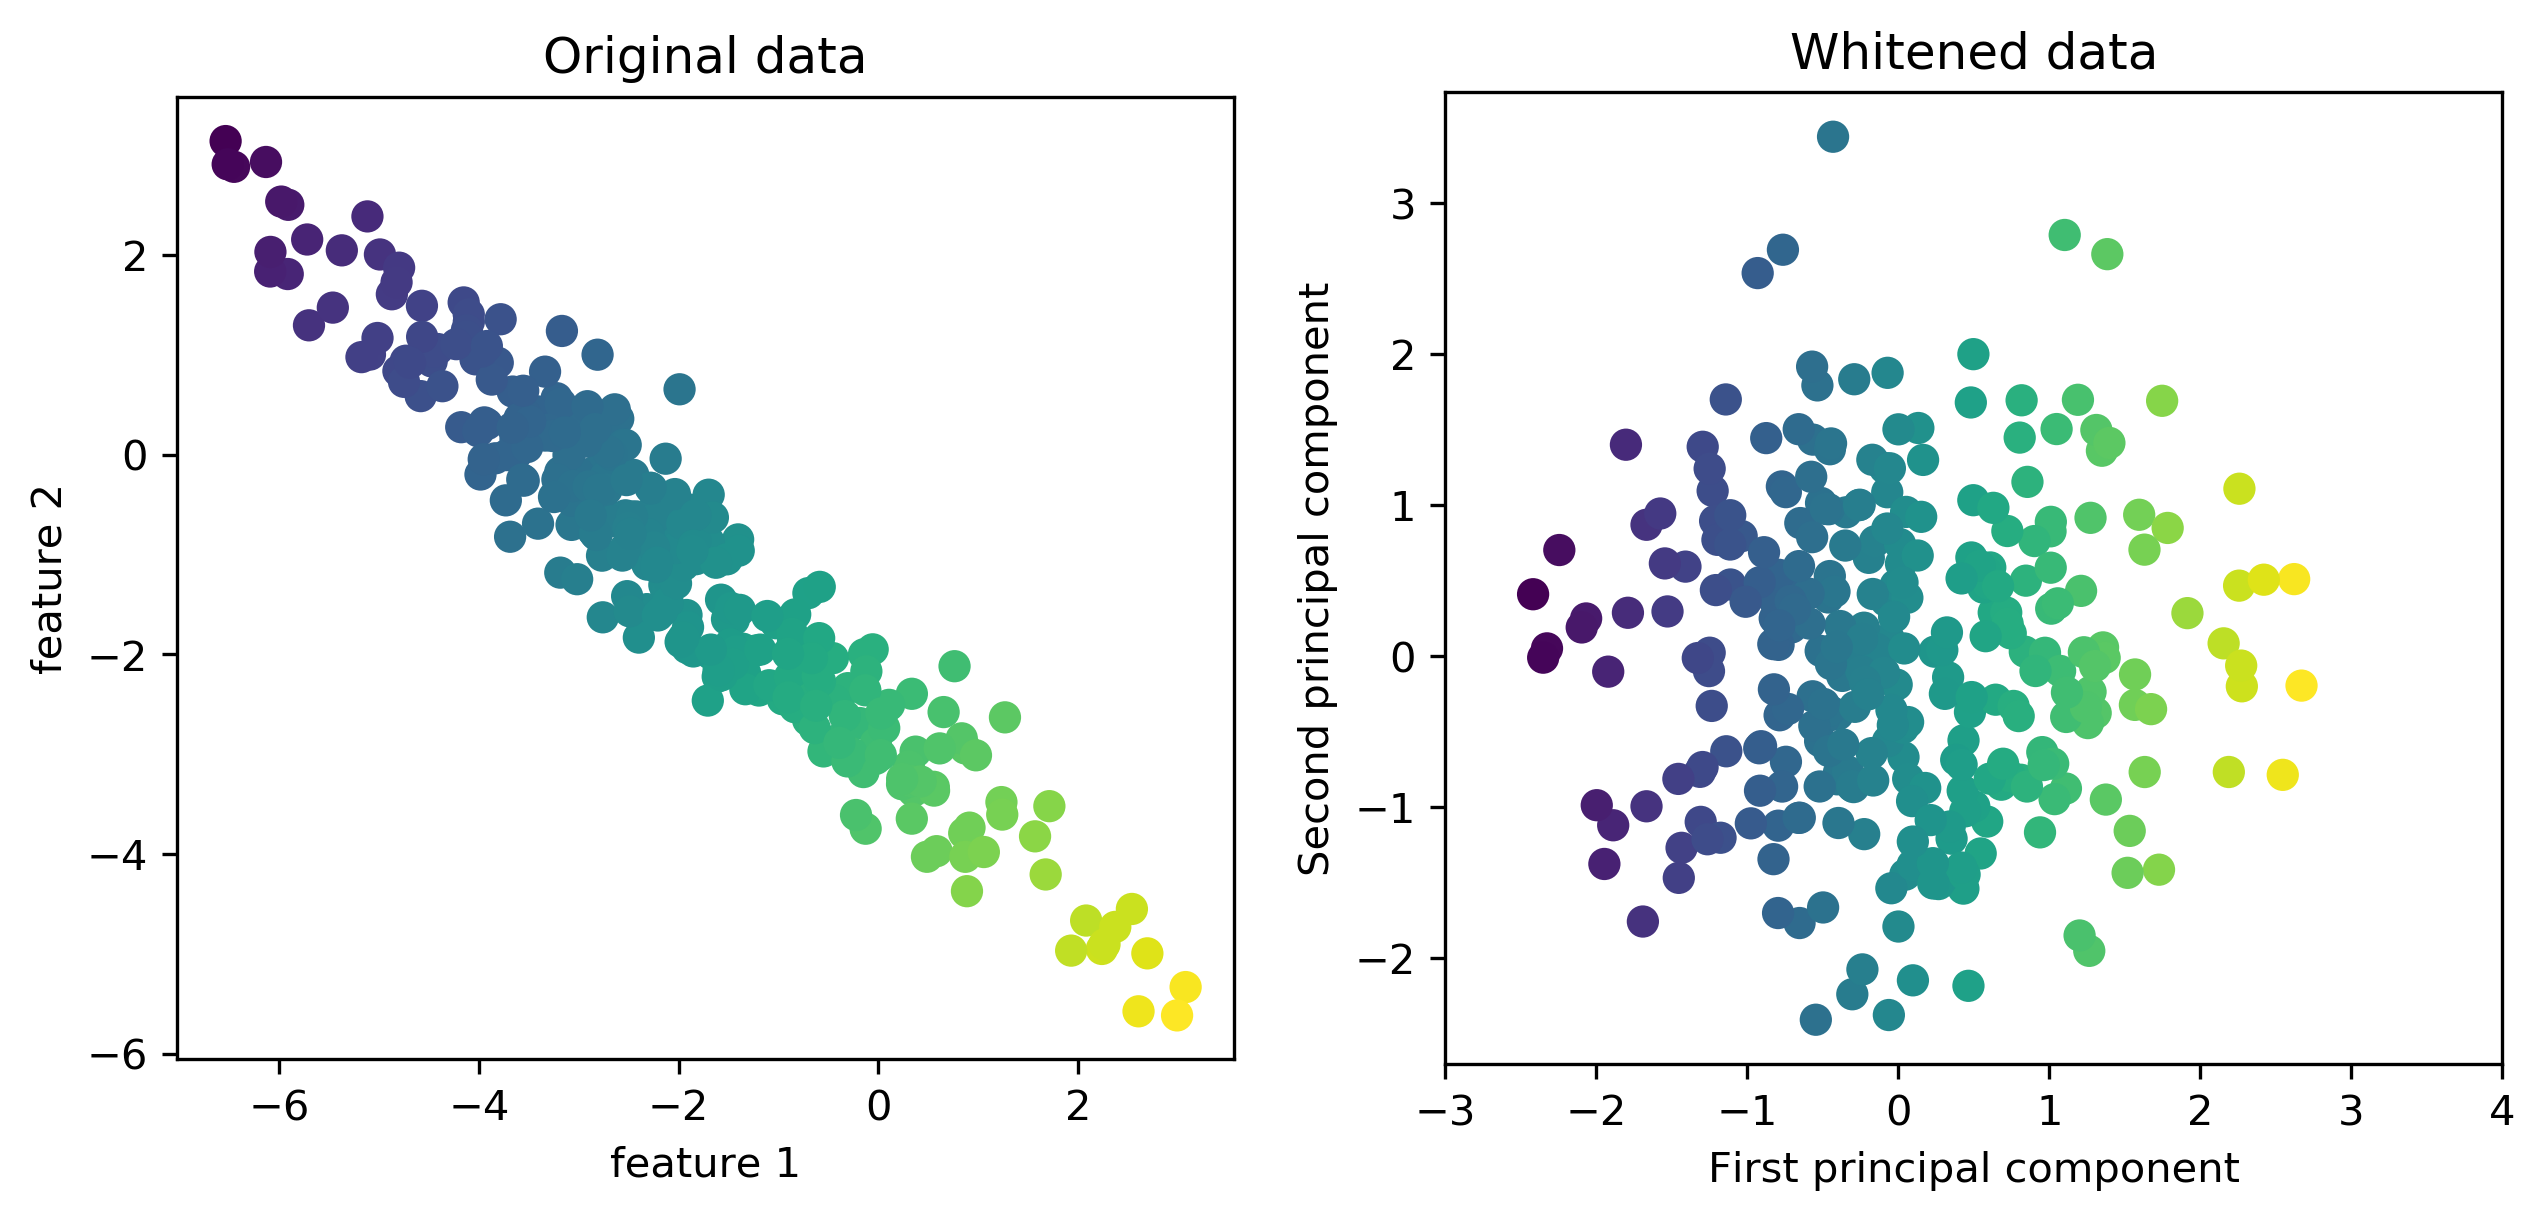

In [26]:
mglearn.plots.plot_pca_whitening()

- PCA를 이용하여 처음 원본 데이터의 5655개의 특성 종류에서 100개의 주성분을 추출하여 특성 개수를 줄이고자 함
- 추출한 주성분을 이용하여 원본 데이터를 변환
  - 주성분 행렬(100, 5655) * 원본 샘플(5655,) = 새로운 특성데이터(100,)

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test) # test는 train한 모델을 가지고 transform

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1482, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.28


- PCA 모델을 활용한 정확도가 0.23 에서 0.31로 향상됨
- 100개의 특성으로 줄일 때, 원본데이터에 불필요한 특성들을 제거하여 가장 좋은 특성들을 이용하여 kNN기법을 적용하여 성능을 높임
  - 앙상블 모델에서는 PCA가 큰 도움이 되지 않는다고 함

In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


- XP = Y
  - (1127,5655)P = (1127,100)
  - P = (5655,100). 위의 결과에 따라 transpose가 필요
  - v1~vn로 이루어진 행렬은 곧 단위행렬을 지향

- 활용하는 분류 모델에 따라 PCA를 활용한 예측 정확도가 달라짐

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state=0)
lr1.fit(X_train, y_train)
print(lr1.score(X_test, y_test))
lr2  = LogisticRegression(random_state=0)
lr2.fit(X_train, y_train)
print(lr2.score(X_test, y_test))

- 이미지인 경우 주성분 시각화 가능

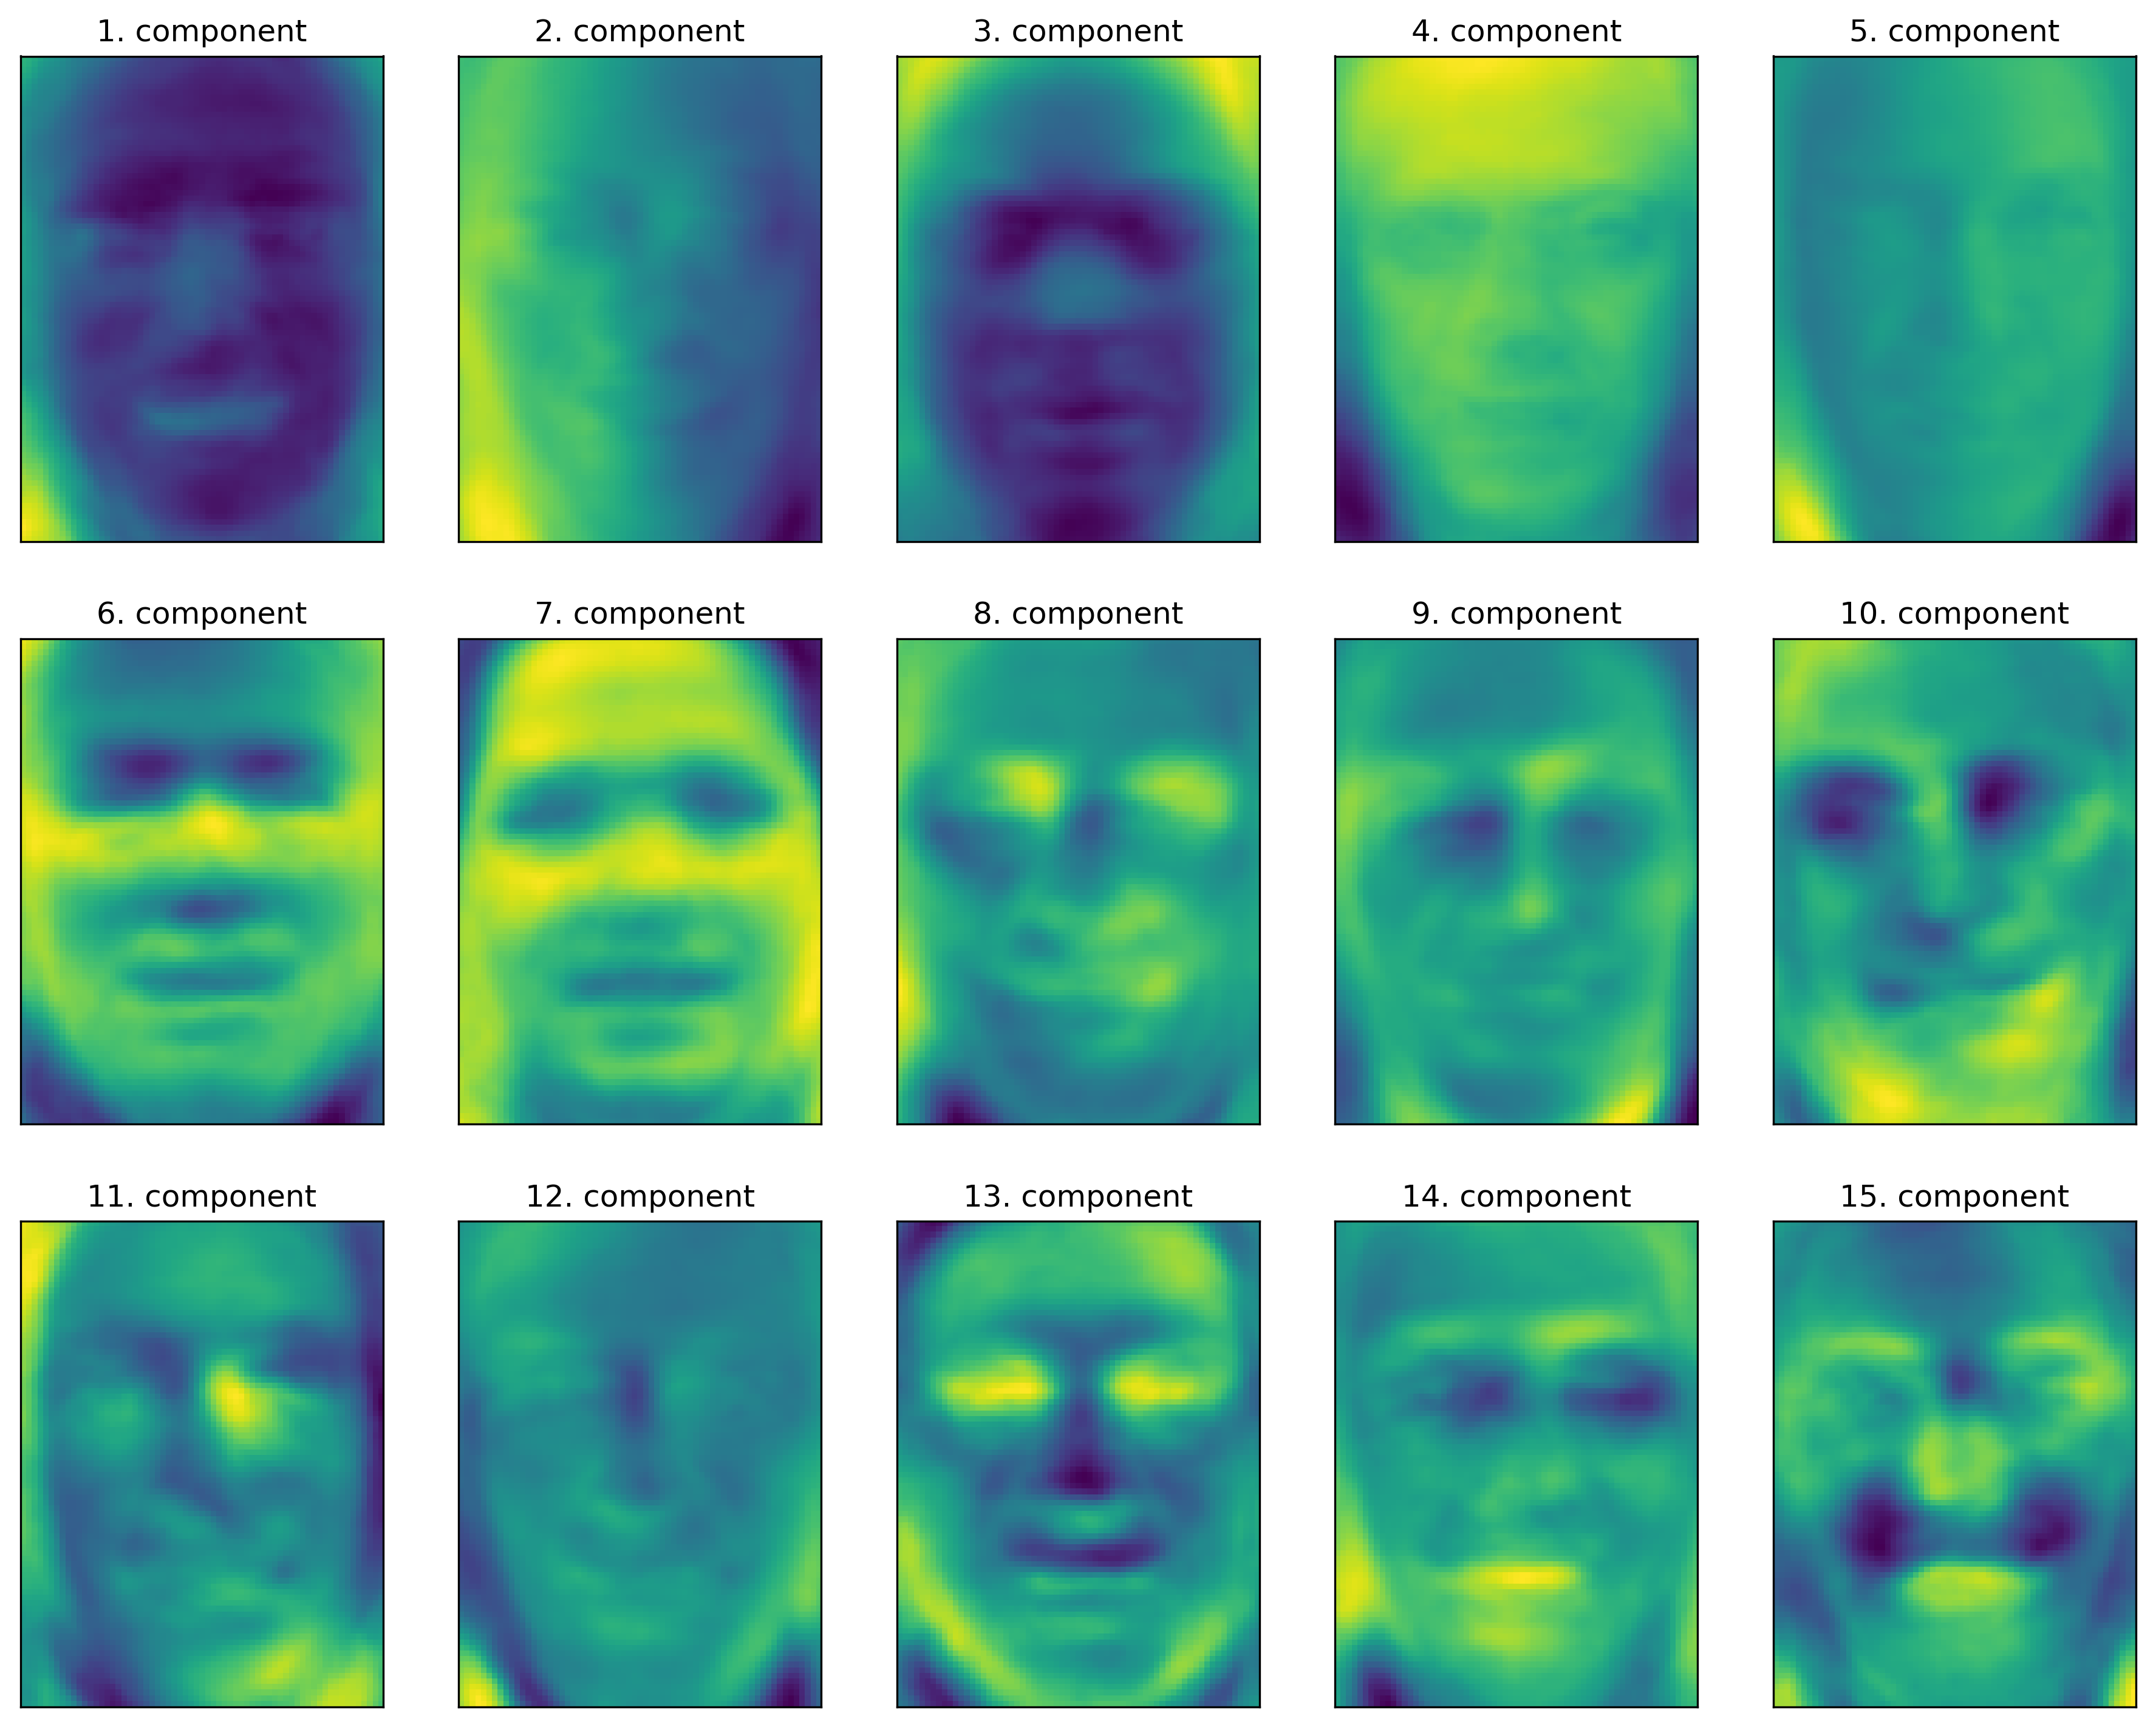

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- 주성분1: 얼굴과 배경의 명암 차이를 기록한 것으로 추정됨
- 주성분2: 오른쪽과 왼쪽의 명암 차이를 담고 있음


- 주성분을 사용하여 원본 데이터를 재구성
  - P주성분 행렬(100, 5655)*X원본 샘플 한 개(5655,) = Y새로운 특성데이터 한 개(100,)
  - transpose of P주성분의 전치행렬(5655,100) * Y새로운 특성데이터 한 개(100,) = X원본 샘플 한 개(5655,)

In [31]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.savefig("images/03-face_decomposition.png")
plt.close()

![decomposition](images/03-face_decomposition.png)

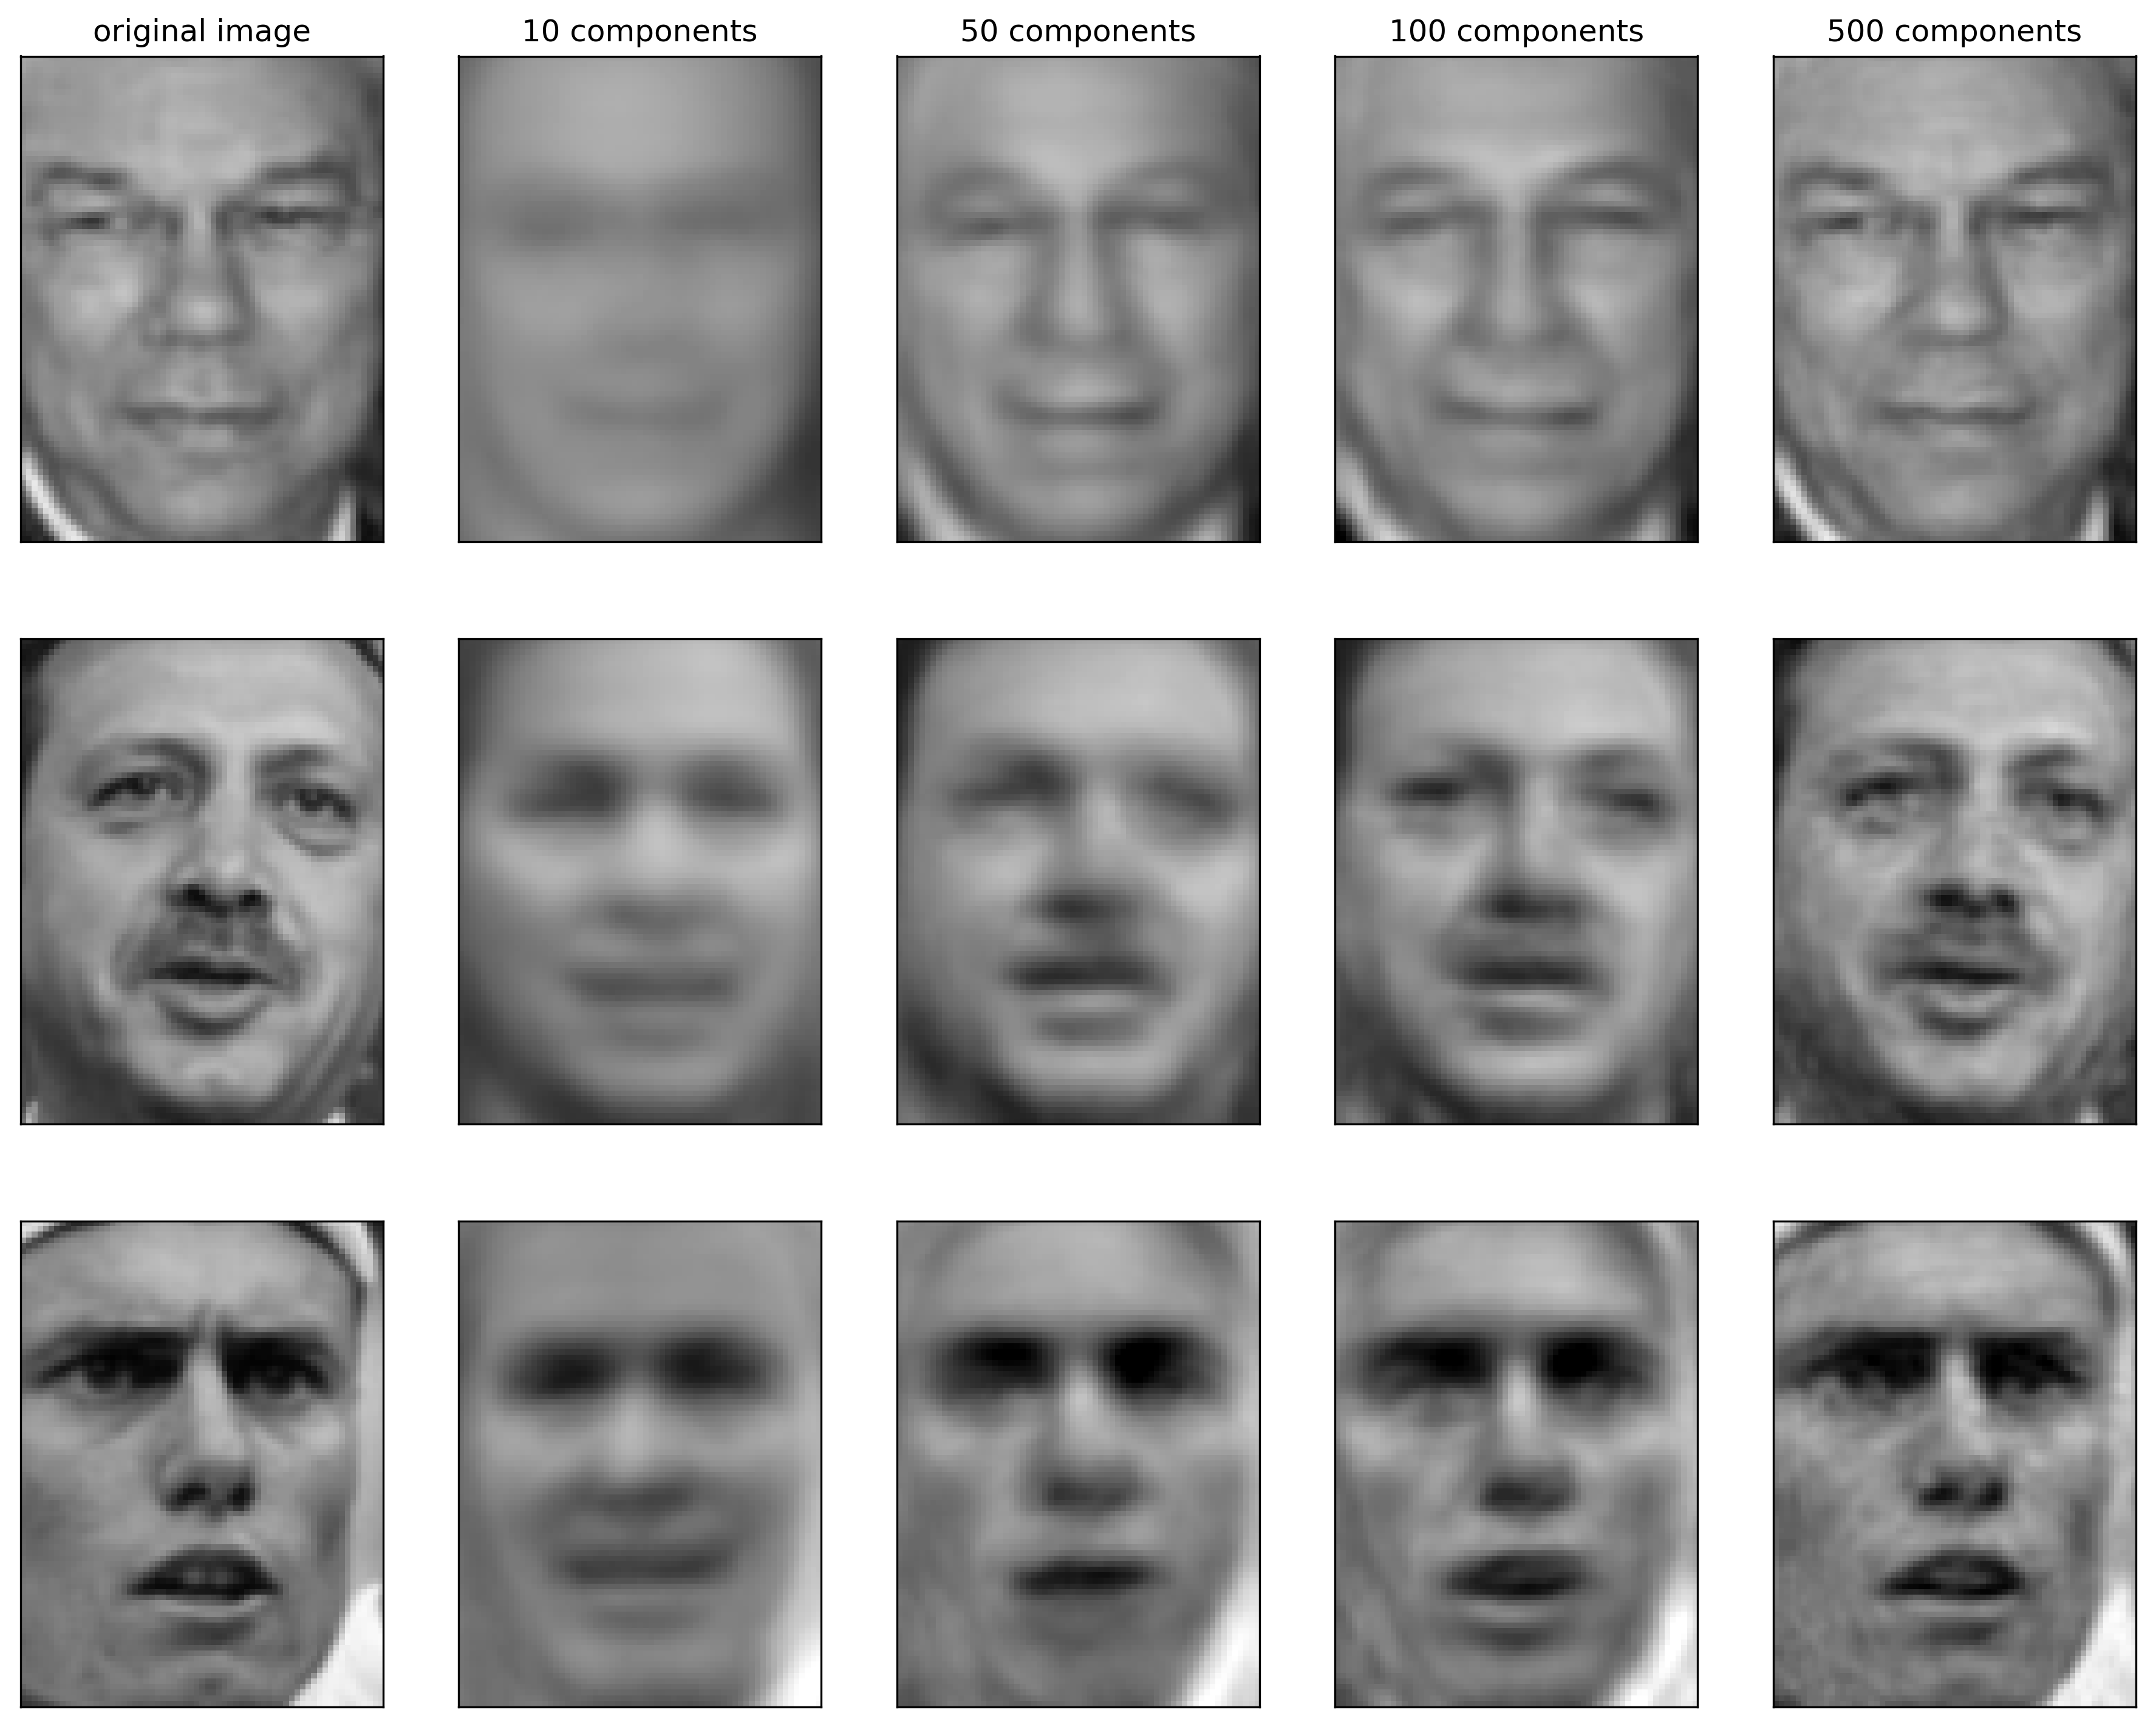

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'Second principal component')

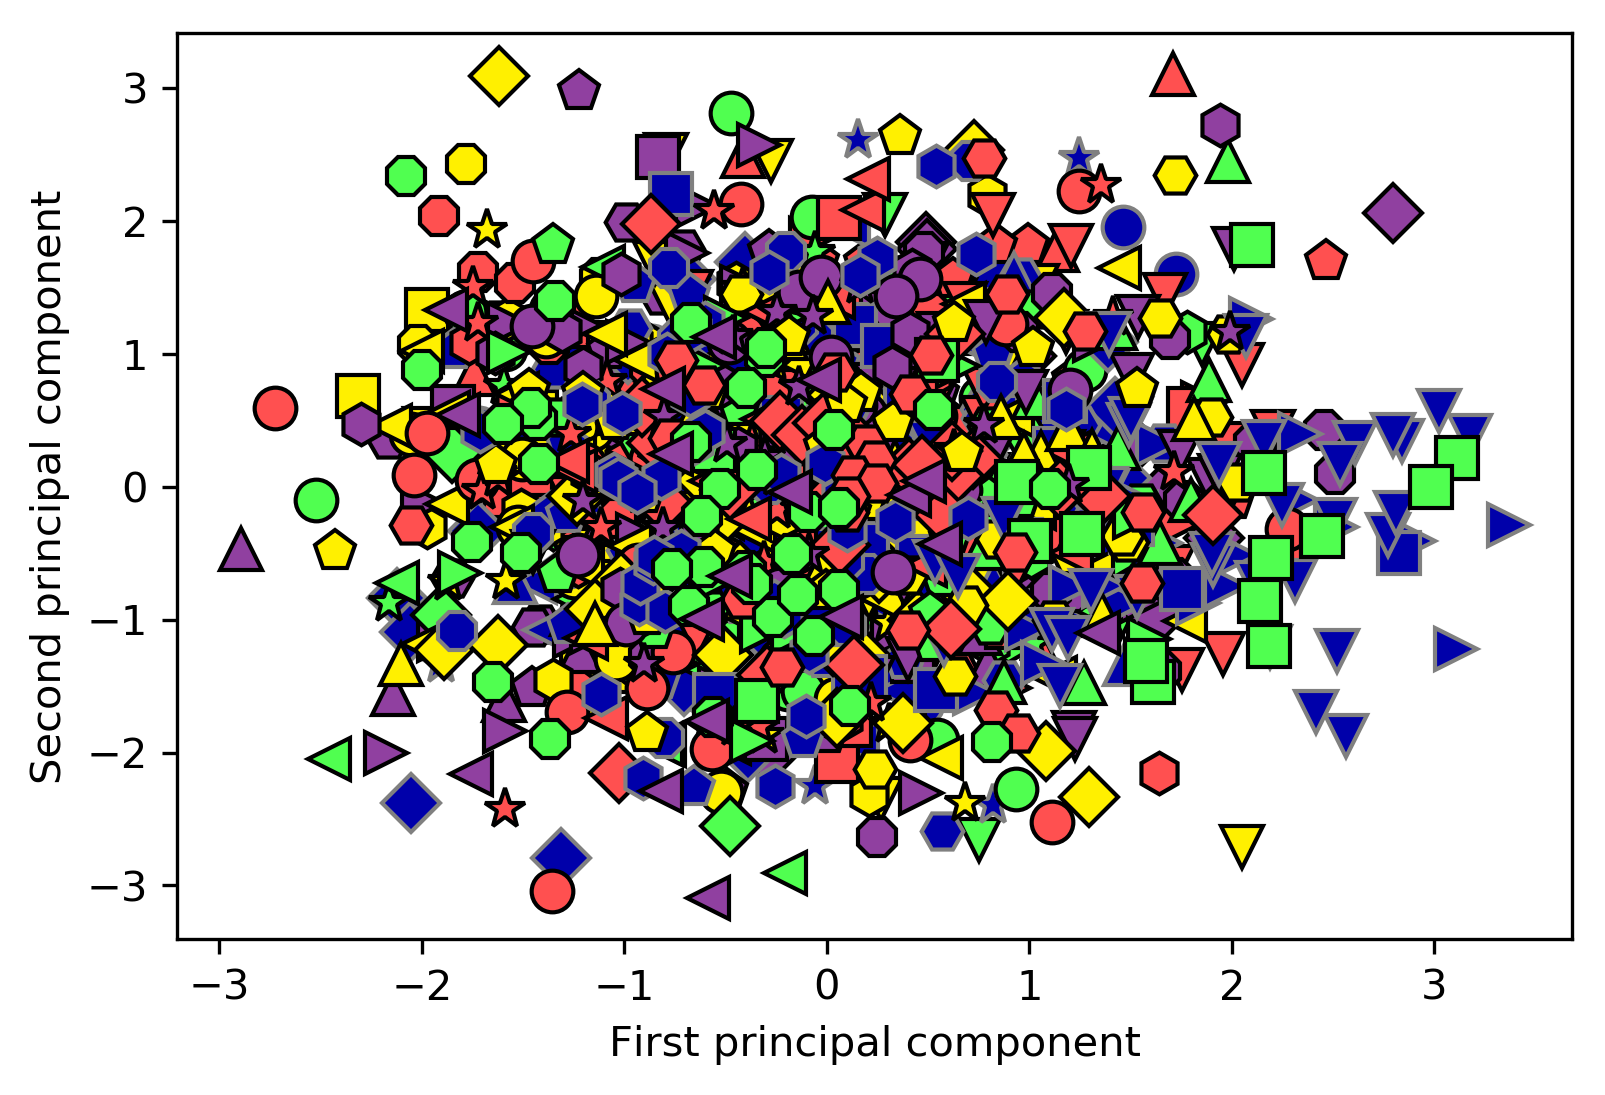

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")